In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

In [105]:
data = pandas.read_csv('AAPL.csv')
data = data.dropna()
data.head(n=15)
#print(data)

,Date,Open,High,Low,Close,Adj Close,Volume
0,04/01/2010,30.49,30.642857,30.340000,30.572857,20.696493,123432400
1,05/01/2010,30.66,30.798571,30.464285,30.625713,20.732279,150476200
2,06/01/2010,30.63,30.747143,30.107143,30.138571,20.402502,138040000
3,07/01/2010,30.25,30.285715,29.864286,30.082857,20.364788,119282800
4,08/01/2010,30.04,30.285715,29.865715,30.282858,20.500179,111902700
5,11/01/2010,30.40,30.428572,29.778572,30.015715,20.319336,115557400
6,12/01/2010,29.88,29.967142,29.488571,29.674286,20.088202,148614900
7,13/01/2010,29.70,30.132856,29.157143,30.092857,20.371561,151473000
8,14/01/2010,30.02,30.065714,29.860001,29.918571,20.253574,108223500
9,15/01/2010,30.13,30.228571,29.410000,29.418571,19.915094,148516900


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03
mean,88.282839,89.026521,87.473989,88.274142,77.548063,8.585978e+07
std,35.786166,35.997959,35.576297,35.802640,40.740506,6.066207e+07
min,27.481428,28.000000,27.178572,27.435715,18.572784,1.147590e+07
25%,57.861427,58.464287,57.317142,57.922855,40.426876,3.923260e+07
50%,85.794289,86.699997,85.037140,86.142860,67.418343,7.069760e+07
75%,113.050003,114.190002,111.870003,113.050003,108.712013,1.134014e+08
max,175.110001,177.199997,174.860001,176.419998,175.703629,4.702495e+08


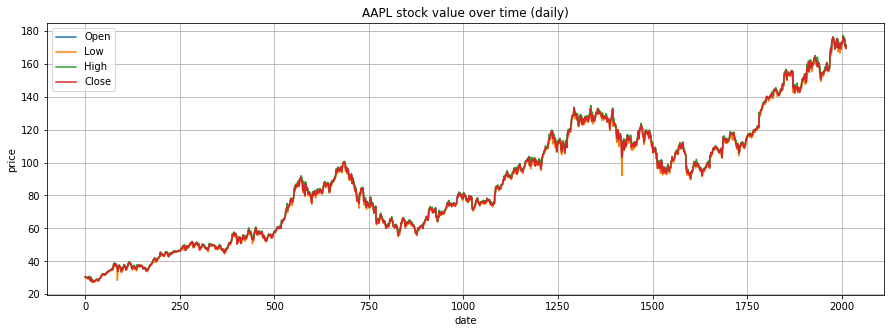

In [4]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(data['Open'])
ax.plot(data['Low'])
ax.plot(data['High'])
ax.plot(data['Close'])
ax.set(xlabel='date', ylabel='price', title='AAPL stock value over time (daily)')
ax.grid()
ax.legend(['Open', 'Low', 'High', 'Close'], loc='upper left')

plt.show()

In [150]:
data = data.set_index('Date')
data.head(n=10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
04/01/2010,30.49,30.642857,30.340000,30.572857,20.696493,123432400
05/01/2010,30.66,30.798571,30.464285,30.625713,20.732279,150476200
06/01/2010,30.63,30.747143,30.107143,30.138571,20.402502,138040000
07/01/2010,30.25,30.285715,29.864286,30.082857,20.364788,119282800
08/01/2010,30.04,30.285715,29.865715,30.282858,20.500179,111902700
11/01/2010,30.40,30.428572,29.778572,30.015715,20.319336,115557400
12/01/2010,29.88,29.967142,29.488571,29.674286,20.088202,148614900
13/01/2010,29.70,30.132856,29.157143,30.092857,20.371561,151473000
14/01/2010,30.02,30.065714,29.860001,29.918571,20.253574,108223500


In [93]:
#print(datetime.strptime('01/11/2010', "%d/%m/%Y").date())
#difference = datetime.strptime('01/11/2010', "%d/%m/%Y").date() + timedelta(days=1)
#print(difference.strftime('%d/%m/%Y'))
#print(test1.index.values)
#print(predictions_df_list.index.values)
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'Open']
        temp_date = datetime.strptime(temp_date, "%d/%m/%Y").date()
        temp_date = test.index.values[i+1]
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'Open']
        temp_date = datetime.strptime(temp_date, "%d/%m/%Y").date()
        temp_date = predictions_df.index.values[i+1]
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

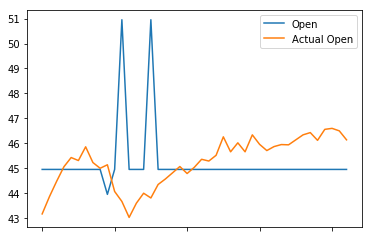

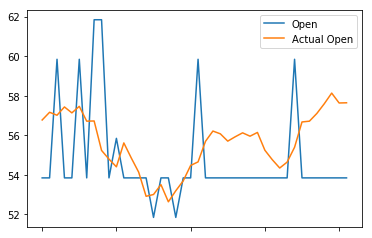

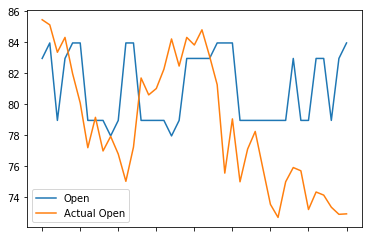

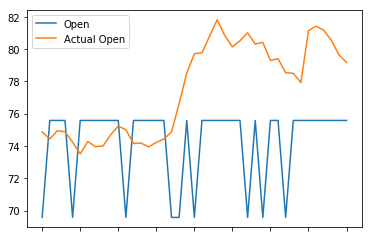

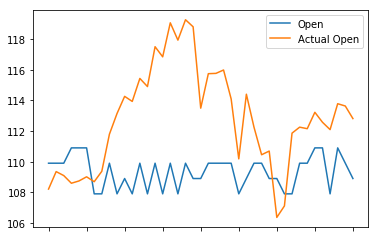

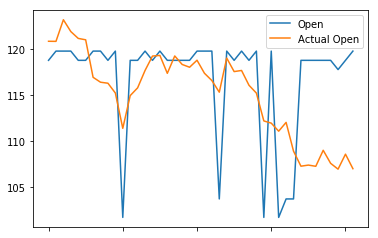

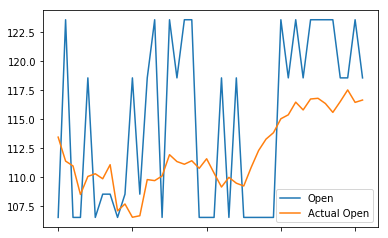

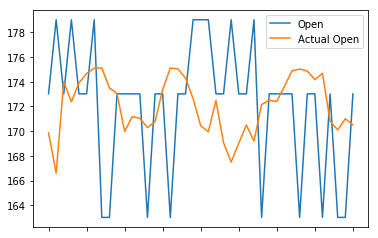

In [152]:
prediction_list = []
prediction_offset_list = []
test_list = []
for i in range(8):
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
    data_list = []
    if i == 0:       
        train1_start = '04/01/2010'
        train1_end = '29/10/2010'
        test1_start = '01/11/2010'
        test1_end = '31/12/2010'
        train1 = data.loc[train1_start : train1_end]
        test1 = data.loc[test1_start : test1_end]
        for date, row in train1.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_train = np.asarray(data_list)
        data_list = []
        for date, row in test1.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_test = np.asarray(data_list)
        # If the column is not an integer, sklearn will throw a ValueType error. No Floats are allowed
        dt = np.dtype(np.int32)
        Y_train = np.asarray(train1['Open'], dtype=dt)
        mlpc.fit(numpy_data_train, Y_train)   
        prediction = mlpc.predict(numpy_data_test)
        prediction_list.append(prediction)
        # Prediction dataframe 
        predictions_df_list = pandas.DataFrame(data=prediction[0:], index=test1.index.values, columns=['Open'])
        difference_test_predicted_prices = offset_value('01/11/2010', test1, predictions_df_list)
        predictions_df_list['Open'] = predictions_df_list['Open'] + difference_test_predicted_prices
        predictions_df_list
        prediction_offset_list.append(np.asarray(predictions_df_list['Open']))
        test_list.append(np.asarray(test1['Open']))
        
        predictions_df_list['Actual Open'] = test1['Open']
        predictions_df_list.plot()
        
    elif i == 1:
        train2_start = '03/01/2011'
        train2_end = '31/10/2011'
        test2_start = '01/11/2011'
        test2_end = '30/12/2011'
        train2 = data.loc[train2_start : train2_end]
        test2 = data.loc[test2_start : test2_end]
        for date, row in train2.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_train = np.asarray(data_list)
        data_list = []
        for date, row in test2.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_test = np.asarray(data_list)
        # If the column is not an integer, sklearn will throw a ValueType error. No Floats are allowed
        Y_train = np.asarray(train2['Open'], dtype=np.int32)
        mlpc.fit(numpy_data_train, Y_train)   
        prediction = mlpc.predict(numpy_data_test)
        prediction_list.append(prediction)
        # Prediction dataframe 
        predictions_df_list = pandas.DataFrame(data=prediction[0:], index=test2.index.values, columns=['Open'])
        difference_test_predicted_prices = offset_value('01/11/2011', test2, predictions_df_list)
        predictions_df_list['Open'] = predictions_df_list['Open'] + difference_test_predicted_prices
        predictions_df_list
        prediction_offset_list.append(np.asarray(predictions_df_list['Open']))
        test_list.append(np.asarray(test2['Open']))
        
        predictions_df_list['Actual Open'] = test2['Open']
        predictions_df_list.plot()
        
    elif i == 2:
        train3_start = '03/01/2012'
        train3_end = '31/10/2012'
        test3_start = '01/11/2012'
        test3_end = '31/12/2012'
        train3 = data.loc[train3_start : train3_end]
        test3 = data.loc[test3_start : test3_end]
        for date, row in train3.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_train = np.asarray(data_list)
        data_list = []
        for date, row in test3.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_test = np.asarray(data_list)
        # If the column is not an integer, sklearn will throw a ValueType error. No Floats are allowed
        Y_train = np.asarray(train3['Open'], dtype=np.int32)
        mlpc.fit(numpy_data_train, Y_train)   
        prediction = mlpc.predict(numpy_data_test)
        prediction_list.append(prediction)
        # Prediction dataframe 
        predictions_df_list = pandas.DataFrame(data=prediction[0:], index=test3.index.values, columns=['Open'])
        difference_test_predicted_prices = offset_value('01/11/2012', test3, predictions_df_list)
        predictions_df_list['Open'] = predictions_df_list['Open'] + difference_test_predicted_prices
        predictions_df_list
        prediction_offset_list.append(np.asarray(predictions_df_list['Open']))
        test_list.append(np.asarray(test3['Open']))
        
        predictions_df_list['Actual Open'] = test3['Open']
        predictions_df_list.plot()
        
    elif i == 3:
        train4_start = '03/01/2013'
        train4_end = '31/10/2013'
        test4_start = '01/11/2013'
        test4_end = '31/12/2013'
        train4 = data.loc[train4_start : train4_end]
        test4 = data.loc[test4_start : test4_end]
        for date, row in train4.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_train = np.asarray(data_list)
        data_list = []
        for date, row in test4.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_test = np.asarray(data_list)
        # If the column is not an integer, sklearn will throw a ValueType error. No Floats are allowed
        Y_train = np.asarray(train4['Open'], dtype=np.int32)
        mlpc.fit(numpy_data_train, Y_train)   
        prediction = mlpc.predict(numpy_data_test)
        prediction_list.append(prediction)
        # Prediction dataframe 
        predictions_df_list = pandas.DataFrame(data=prediction[0:], index=test4.index.values, columns=['Open'])
        difference_test_predicted_prices = offset_value('01/11/2013', test4, predictions_df_list)
        predictions_df_list['Open'] = predictions_df_list['Open'] + difference_test_predicted_prices
        predictions_df_list
        prediction_offset_list.append(np.asarray(predictions_df_list['Open']))
        test_list.append(np.asarray(test4['Open']))
        
        predictions_df_list['Actual Open'] = test4['Open']
        predictions_df_list.plot()
        
    elif i == 4:
        train5_start = '03/01/2014'
        train5_end = '31/10/2014'
        test5_start = '03/11/2014'
        test5_end = '31/12/2014'
        train5 = data.loc[train5_start : train5_end]
        test5 = data.loc[test5_start : test5_end]
        for date, row in train5.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_train = np.asarray(data_list)
        data_list = []
        for date, row in test5.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_test = np.asarray(data_list)
        # If the column is not an integer, sklearn will throw a ValueType error. No Floats are allowed
        Y_train = np.asarray(train5['Open'], dtype=np.int32)
        mlpc.fit(numpy_data_train, Y_train)   
        prediction = mlpc.predict(numpy_data_test)
        prediction_list.append(prediction)
        # Prediction dataframe 
        predictions_df_list = pandas.DataFrame(data=prediction[0:], index=test5.index.values, columns=['Open'])
        difference_test_predicted_prices = offset_value('03/11/2014', test5, predictions_df_list)
        predictions_df_list['Open'] = predictions_df_list['Open'] + difference_test_predicted_prices
        predictions_df_list
        prediction_offset_list.append(np.asarray(predictions_df_list['Open']))
        test_list.append(np.asarray(test5['Open']))
        
        predictions_df_list['Actual Open'] = test5['Open']
        predictions_df_list.plot()
        
    elif i == 5:
        train6_start = '02/01/2015'
        train6_end = '30/10/2015'
        test6_start = '02/11/2015'
        test6_end = '31/12/2015'
        train6 = data.loc[train6_start : train6_end]
        test6 = data.loc[test6_start : test6_end]
        for date, row in train6.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_train = np.asarray(data_list)
        data_list = []
        for date, row in test6.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_test = np.asarray(data_list)
        # If the column is not an integer, sklearn will throw a ValueType error. No Floats are allowed
        Y_train = np.asarray(train6['Open'], dtype=np.int32)
        mlpc.fit(numpy_data_train, Y_train)   
        prediction = mlpc.predict(numpy_data_test)
        prediction_list.append(prediction)
        # Prediction dataframe 
        predictions_df_list = pandas.DataFrame(data=prediction[0:], index=test6.index.values, columns=['Open'])
        difference_test_predicted_prices = offset_value('02/11/2015', test6, predictions_df_list)
        predictions_df_list['Open'] = predictions_df_list['Open'] + difference_test_predicted_prices
        predictions_df_list
        prediction_offset_list.append(np.asarray(predictions_df_list['Open']))
        test_list.append(np.asarray(test6['Open']))
        
        predictions_df_list['Actual Open'] = test6['Open']
        predictions_df_list.plot()
        
    elif i == 6:
        train7_start = '04/01/2016'
        train7_end = '31/10/2016'
        test7_start = '01/11/2016'
        test7_end = '30/12/2016'
        train7 = data.loc[train7_start : train7_end]
        test7 = data.loc[test7_start : test7_end]
        for date, row in train7.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_train = np.asarray(data_list)
        data_list = []
        for date, row in test7.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_test = np.asarray(data_list)
        # If the column is not an integer, sklearn will throw a ValueType error. No Floats are allowed
        Y_train = np.asarray(train7['Open'], dtype=np.int32)
        mlpc.fit(numpy_data_train, Y_train)   
        prediction = mlpc.predict(numpy_data_test)
        prediction_list.append(prediction)
        # Prediction dataframe 
        predictions_df_list = pandas.DataFrame(data=prediction[0:], index=test7.index.values, columns=['Open'])
        difference_test_predicted_prices = offset_value('01/11/2016', test7, predictions_df_list)
        predictions_df_list['Open'] = predictions_df_list['Open'] + difference_test_predicted_prices
        predictions_df_list
        prediction_offset_list.append(np.asarray(predictions_df_list['Open']))
        test_list.append(np.asarray(test7['Open']))
        
        predictions_df_list['Actual Open'] = test7['Open']
        predictions_df_list.plot()
        
    else:
        train8_start = '03/01/2017'
        train8_end = '31/10/2017'
        test8_start = '01/11/2017'
        test8_end = '29/12/2017'
        train8 = data.loc[train8_start : train8_end]
        test8 = data.loc[test8_start : test8_end]
        for date, row in train8.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_train = np.asarray(data_list)
        data_list = []
        for date, row in test8.T.iteritems():
            row_data = np.asarray([data.loc[date, 'High'], data.loc[date, 'Low'], 
                                   data.loc[date, 'Close']])
            data_list.append(row_data)
        numpy_data_test = np.asarray(data_list)
        # If the column is not an integer, sklearn will throw a ValueType error. No Floats are allowed
        Y_train = np.asarray(train8['Open'], dtype=np.int32)
        mlpc.fit(numpy_data_train, Y_train)   
        prediction = mlpc.predict(numpy_data_test)
        prediction_list.append(prediction)
        # Prediction dataframe 
        predictions_df_list = pandas.DataFrame(data=prediction[0:], index=test8.index.values, columns=['Open'])
        difference_test_predicted_prices = offset_value('01/11/2017', test8, predictions_df_list)
        predictions_df_list['Open'] = predictions_df_list['Open'] + difference_test_predicted_prices
        prediction_offset_list.append(np.asarray(predictions_df_list['Open']))
        test_list.append(np.asarray(test8['Open']))
        
        predictions_df_list['Actual Open'] = test8['Open']
        predictions_df_list.plot()

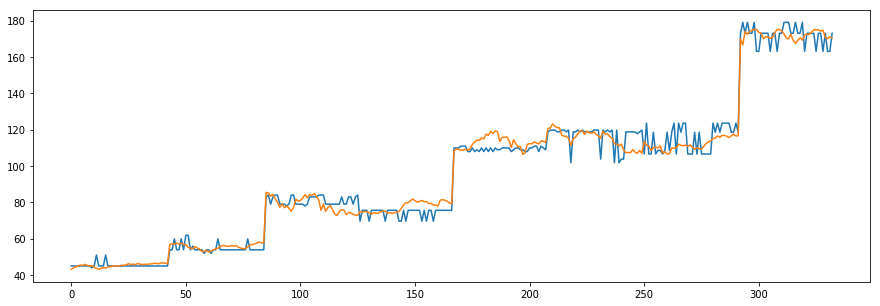

In [155]:
data = pandas.read_csv('AAPL.csv')
all_predictions = []
all_tests = []
for i in range(len(prediction_offset_list)):
    for j in range(len(prediction_offset_list[i])):
        all_predictions.append(prediction_offset_list[i][j])
        
for i in range(len(test_list)):
    for j in range(len(test_list[i])):
        all_tests.append(test_list[i][j])
        
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(all_predictions)
ax.plot(all_tests)

plt.show()